# Assignment

Use the "from the expert" (FTE) jupyter notebook as a starter for this assignment, and ask your instructor questions if you need help.

Use the `churn_data.csv` file to carry out a similar EDA and visualization process as what we did in the FTE. Create at least 2 EDA plots, and create a HTML file with an auto-EDA analysis using pandas-profiling or another auto-EDA Python package. Write a short analysis at the end of the assignment in markdown. 

## Data science process steps this week
We will carry out the first two parts of the CRISP-DM data science process this week:

1. Business understanding

This is customer churn data for a telecommunications company. Customers can have phone as well as other services. The company is looking to reduce customer churn, where customers stop using the company's services and cancel their account. The 'Churn' column has a binary target, yes or no, that denotes if a customer churned. We want to create a machine learning model to predict the Churn target using the other available data in the dataset. Ideally, we will deploy this model to integrate with the company's database, so that a churn risk column is created for each customer. This will enable customer service reps and others to devise and use strategies to reduce churn.


2. Data understanding

Carry out some EDA as we did in the FTE, such as using pandas-profiling. Create a histogram like we did in the FTE, where we plot a numeric column with the target as the 'hue'. Optional challenge: create other plots with the target as the hue, such as bar plots for the categorical columns.

In [2]:
import pandas as pd

In [192]:
df = pd.read_csv('~/documents/MSDS_VaishaliWork/MSDS600_DataScience/Week1_Lab1_Python/Assignment1/churn_data.csv',index_col= 'customerID')
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...
6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No


In [193]:
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt

In [78]:
report = ProfileReport(df)
report.to_file('ChurnData_eda.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [195]:
#Report generated in html is as below 
report

As per the report, TotalCharges column has missing values. Removing the rows with missing values and creating an html file again. 

In [77]:
df["TotalCharges"].isnull()
df.dropna(inplace = True)

df.dropna(inplace=True)
# Now missing cells are zero.

In [23]:
# To show up graphs
%matplotlib inline

In [102]:
# Checking if all columns are having correct data types as per data csv
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   PhoneService    7043 non-null   object 
 2   Contract        7043 non-null   object 
 3   PaymentMethod   7043 non-null   object 
 4   MonthlyCharges  7043 non-null   float64
 5   TotalCharges    7032 non-null   float64
 6   Churn           7043 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 698.2+ KB


Numeric EDA -- Numeric stats on numeric columns

In [8]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [190]:
#df.plot(kind='scatter', x='MonthlyCharges', y='TotalCharges',
   # color='DarkGreen', ax = ax);
   # df.filter(df['totalCharges']<20 )

# Histogram with numeric columns and target "Churn" as hue 

<Axes: xlabel='tenure', ylabel='Count'>

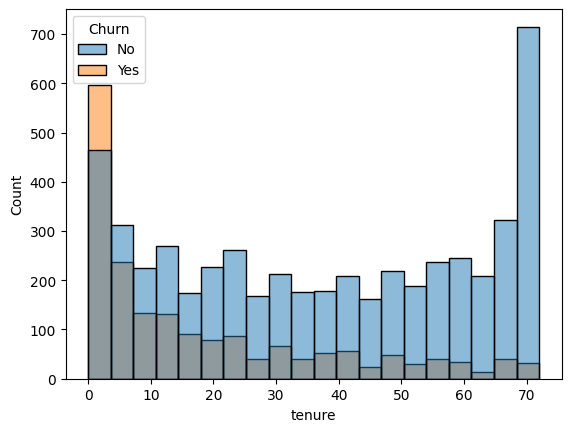

In [188]:
# Importing a seaborn Library to try few statistical graphs

import seaborn as sns
# Using a numeric column "Tenure"
sns.histplot(data=df,x=df['tenure'],hue='Churn',bins=20)

In [196]:
df['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

<Axes: xlabel='TotalCharges', ylabel='Count'>

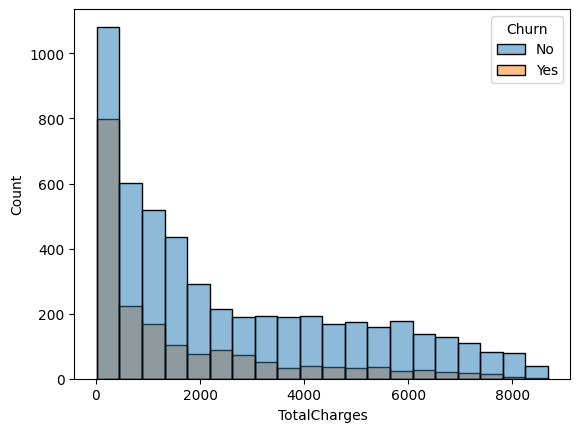

In [186]:
# With column MonthlyCharges.
sns.histplot(data=df,x=df['TotalCharges'],hue='Churn',bins=20)

As only "Yes" values for "Churn" are very minimal in data for particular "Total Charge" value, the graph only shows "No" and overlapping data. Also people with less tenure churn more.

In [189]:
# bins = [0,1000,2000,3000,4000,5000,6000,7000]
# df['bins']=pd.cut(df['TotalCharges'],bins)
# ab= df.groupby(df['bins']).size()
# ab
# df['TotalCharges'].hist(df['Churn'])

# Bar Plots for Categorical columns with target "Churn" as hue 

In given data, we have two columns with categories as value :- Contract, PhoneService 

In [70]:
# Unique values of 
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
#sns.scatterplot(data = None,x='TotalCharges', y='tenure',hue = 'Churn',size = 'Churn')

# g = sns.FacetGrid(df, row="tenure", col="TotalCharges", hue="Churn")
# g.map(plt.scatter, "tenure", "TotalCharges")
# g.add_legend()
#df.plot(kind='scatter', x='TotalCharges', y='tenure',c = 'MonthlyCharges',s= 50)

<Axes: xlabel='Contract'>

<Figure size 1000x600 with 0 Axes>

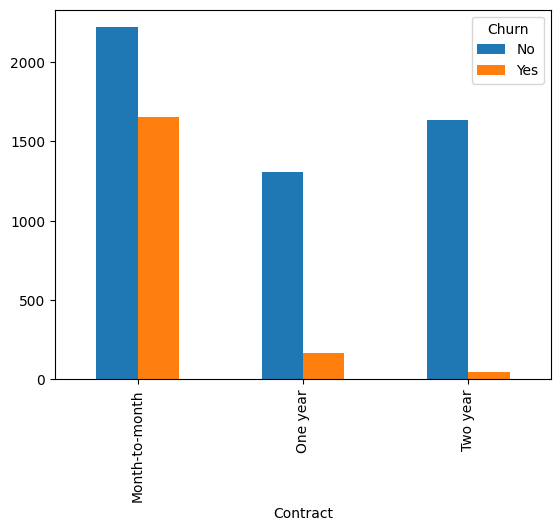

In [71]:
fig = plt.figure(figsize=(10, 6)) 
pd.crosstab(df['Contract'],df['Churn']).plot(kind = 'bar')

Customers with month-to-month plans have higher churn rates as compared to clients with yearly contracts.

In [201]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

<Axes: xlabel='PhoneService'>

<Figure size 1000x600 with 0 Axes>

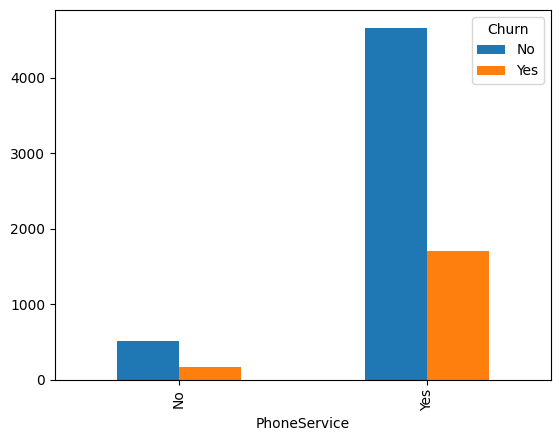

In [197]:
# Using PhoneService column
fig = plt.figure(figsize=(10, 6)) 
pd.crosstab(df['PhoneService'],df['Churn']).plot(kind = 'bar')

# Count Plot using "tenure" column with target "Churn" as hue

<Axes: xlabel='tenure', ylabel='count'>

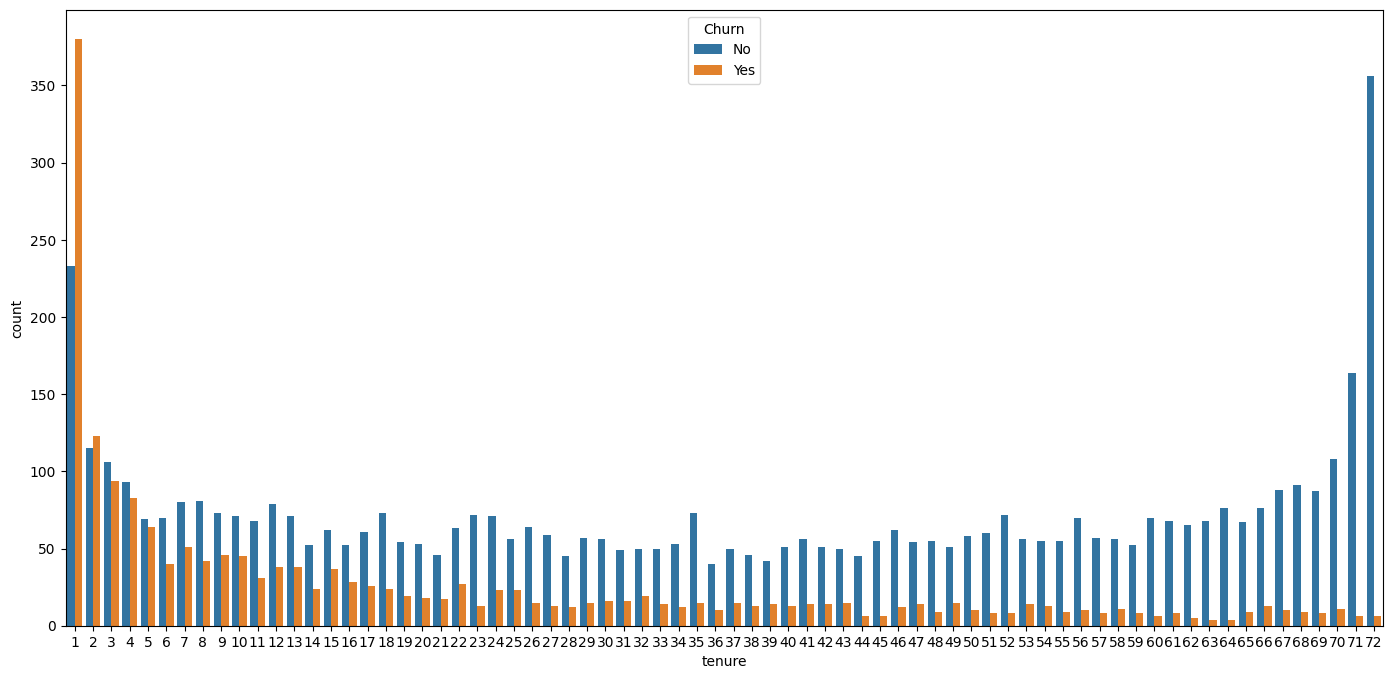

In [61]:
plt.figure(figsize=(17,8))
sns.countplot(x=df['tenure'],hue=df['Churn'])

# Scattered Plot using "tenure" and "TotalCharges" columns with target "Churn" as hue

<Axes: xlabel='TotalCharges', ylabel='tenure'>

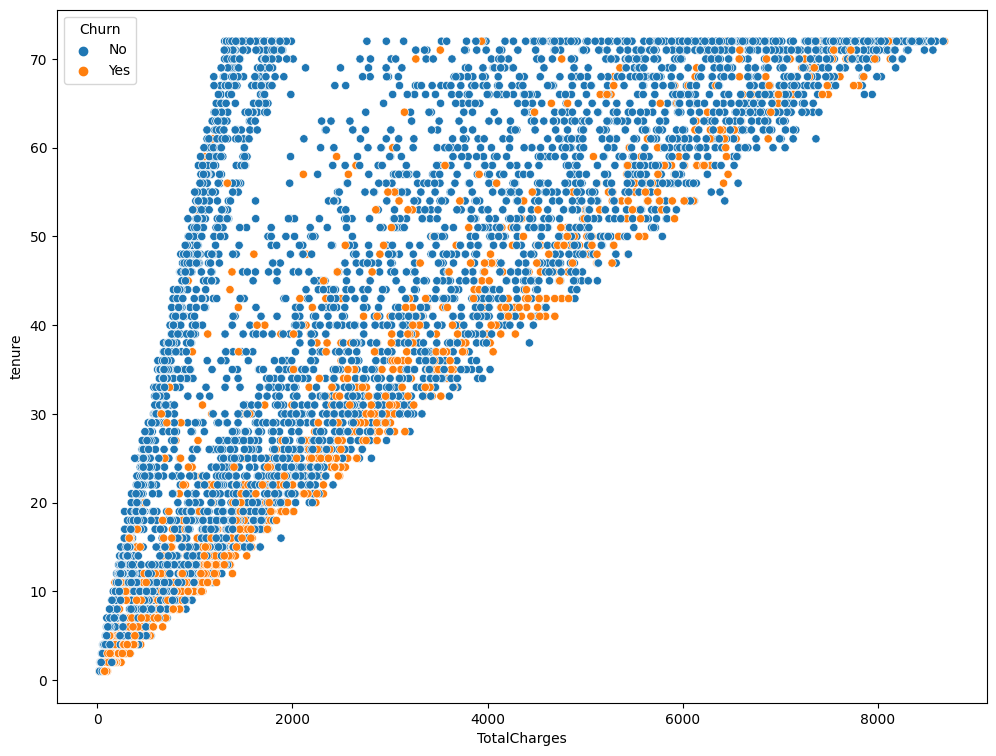

In [69]:
plt.figure(figsize=(12,9))
sns.scatterplot(x=df['TotalCharges'],y= df['tenure'], hue=df['Churn'])

Final Analysis :-

People with less tenure tend to churn more as compared to long term customers. Graphs on categorical data show that customers with month-to-month plans have higher churn rates as compared to clients with yearly contracts. Phone services available or not with the customers tend to impact less on churn rate. If company can offer some plans that have higher tenure and yearly contracts, it should reduce the churn rate upto some extent.